# Creating Composite Sounding Plots

This tutorial creates SounderPy Composite Soundings.

#### Here we will explore:   
- Choosing data
- Building composite plots
- Customizing composite Plots
- Saving composite plots to a file

In [1]:
# First lets import SounderPy. Its fun to import as 'spy'!
import sounderpy as spy


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                    v3.0.0 | Jan. 2024 | (C) Kyle J Gillett                       ##
## -------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------- ##



## **Choosing Data**

### SounderPy's Composite Sounding function will ingest any data native to SounderPy! 

- #### **This could be...**

    - ACARS Aircraft Observations 
    - RAOB Observations
    - BUFKIT Forecasts
    - RAP/RUC Reanalysis
    - NCEP FNL Reanalysis 
    - ERA5 Reanalysis 

### The goal of the Composite Sounding is to compare profiles to each other. Examples of this could be...

- #### **Forecast Model Data:**

    - Comparing different BUFKIT models for the same forecast hour (12z HRRR, GFS, NAM at forecast hour 12)
    - Comparing BUFKIT model runs for the same hour (06z, 12z, 18z runs, valid at 00z)
    - Comparing forecast hours for a specific model run (12z HRRR at F00, F01, F02, F03 etc)
    
- #### **Observed Data:**
    
    - Comparing different launch times for the same station (12z, 18z, 00z at OUN)
    - Comparing several area stations at a given time (JAN, BMX, LIX at 18z)
    - The same can be done for ACARS aircraft observations! (DAL at 0200z, 0210z, 0230z)
    
- #### **Reanalysis Data:**
    
    - Comparing different valid times for a given location (23z, 00z, 01z at [43.2, -83.5])
    

- #### **Mixing data types!!**
    
    - Compare past model preformance against observations! 
    - Compare reanalysis with observations to see how close the reanalysis is to the actual atmosphere
    - Check analogs by comparing reanalysis cases or observations to forecast model data
    
The combos are endless, and SounderPy can do it all! 


-------



## **The `build_composite()` function**

- ### **`build_composite(data_list, dark_mode=False, shade_between=False, alphas_to_use='none', colors_to_use='none', ls_to_use='none', lw_to_use='none', save=False, filename='sounderpy_sounding')`**

    - `data_list` (list of dicts, required) – a list of data dictionaries for each profile to be plotted

    - `dark_mode` (bool, optional) – True will invert the color scheme for a ‘dark-mode’ sounding. Default is False.

    - `shade_between` (bool, optional) – Lightly shade between the dewpoint & temperature trace. In many cases, this improves readability. Default is True.

    - `alphas_to_use` (list of floats, optional) – A list of custom alphas (0.0-1.0). List length must match the number of profiles listed in data_list. Default is ‘none’. Default alpha is 1.

    - `colors_to_use` (list of strings, optional) – A list of custom matplotlib color name stings. List length must match the number of profiles listed in data_list. Default is ‘none’.

    - `ls_to_use` (list of stings, optional) – A list of custom matplotlib linestyles. List length must match the number of profiles listed in data_list. Default is ‘none’. Default linestyle is ‘-‘.

    - `lw_to_use` (list of floats, optional) – A list of custom linewidths. List length must match the number of profiles listed in data_list. Default is ‘none’. Default linewidth is 3.

    - `save` (bool, optional) – whether to show the plot inline or save to a file. Default is False which displays the file inline.

    - `filename` (str, optional) – the filename by which a file should be saved to if save = True. Default is sounderpy_sounding.

--------


## Building a Composite Sounding

First, we need a `list` of 'clean_data' `dictionaries`. Lets get multiple dictionaries of data, and for this tutorial, lets examine forecast model preformance for the May 20, 2022 Gaylord, MI EF3 tornado event. We can compare the forecast models against the 18z observation from APX (Gaylord)

In [2]:
# get data for 12z model runs at F06 for 18z 05-20-2022
# the `hush` kwarg is used here to reduce the amount of printed 
# output produced by the `get_bufkit_data()` & `get_obs_data()` functions

hrrr = spy.get_bufkit_data('hrrr', 'apx', 6, '2022', '05', '20', '12', hush=True)
rap = spy.get_bufkit_data('rap', 'apx', 6, '2022', '05', '20', '12', hush=True)
nam = spy.get_bufkit_data('nam', 'apx', 6, '2022', '05', '20', '12', hush=True)
gfs = spy.get_bufkit_data('gfs', 'apx', 6, '2022', '05', '20', '12', hush=True)

# get data for the 18z RAOB launch from APX
raob = spy.get_obs_data('apx', '2022', '05', '20', '18', hush=True)

> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00
> SUMMARY: 12Z HRRR F06 for APX, GAYLORD at 05-20-2022-18Z
> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00
> SUMMARY: 12Z RAP F06 for APX, GAYLORD at 05-20-2022-18Z
> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00
> SUMMARY: 12Z NAM F06 for APX, GAYLORD at 05-20-2022-18Z
> BUFKIT DATA ACCESS FUNCTION --
---------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00
> SUMMARY: 12Z GFS F06 for APX, GAYLORD at 05-20-2022-18Z
> OBSERVED DATA ACCESS FUNCTION --
-----------------------------------
> PROFILE FOUND: APX on 05/20/2022 at 18z | From UW
> COMPLETE --------
> RUNTIME: 00:00:01
> SUMMARY: 18Z Launch for KAPX, GAYLORD at 05-20-2022-18Z


> COMPOSITE SOUNDING FUNCTION --
-------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


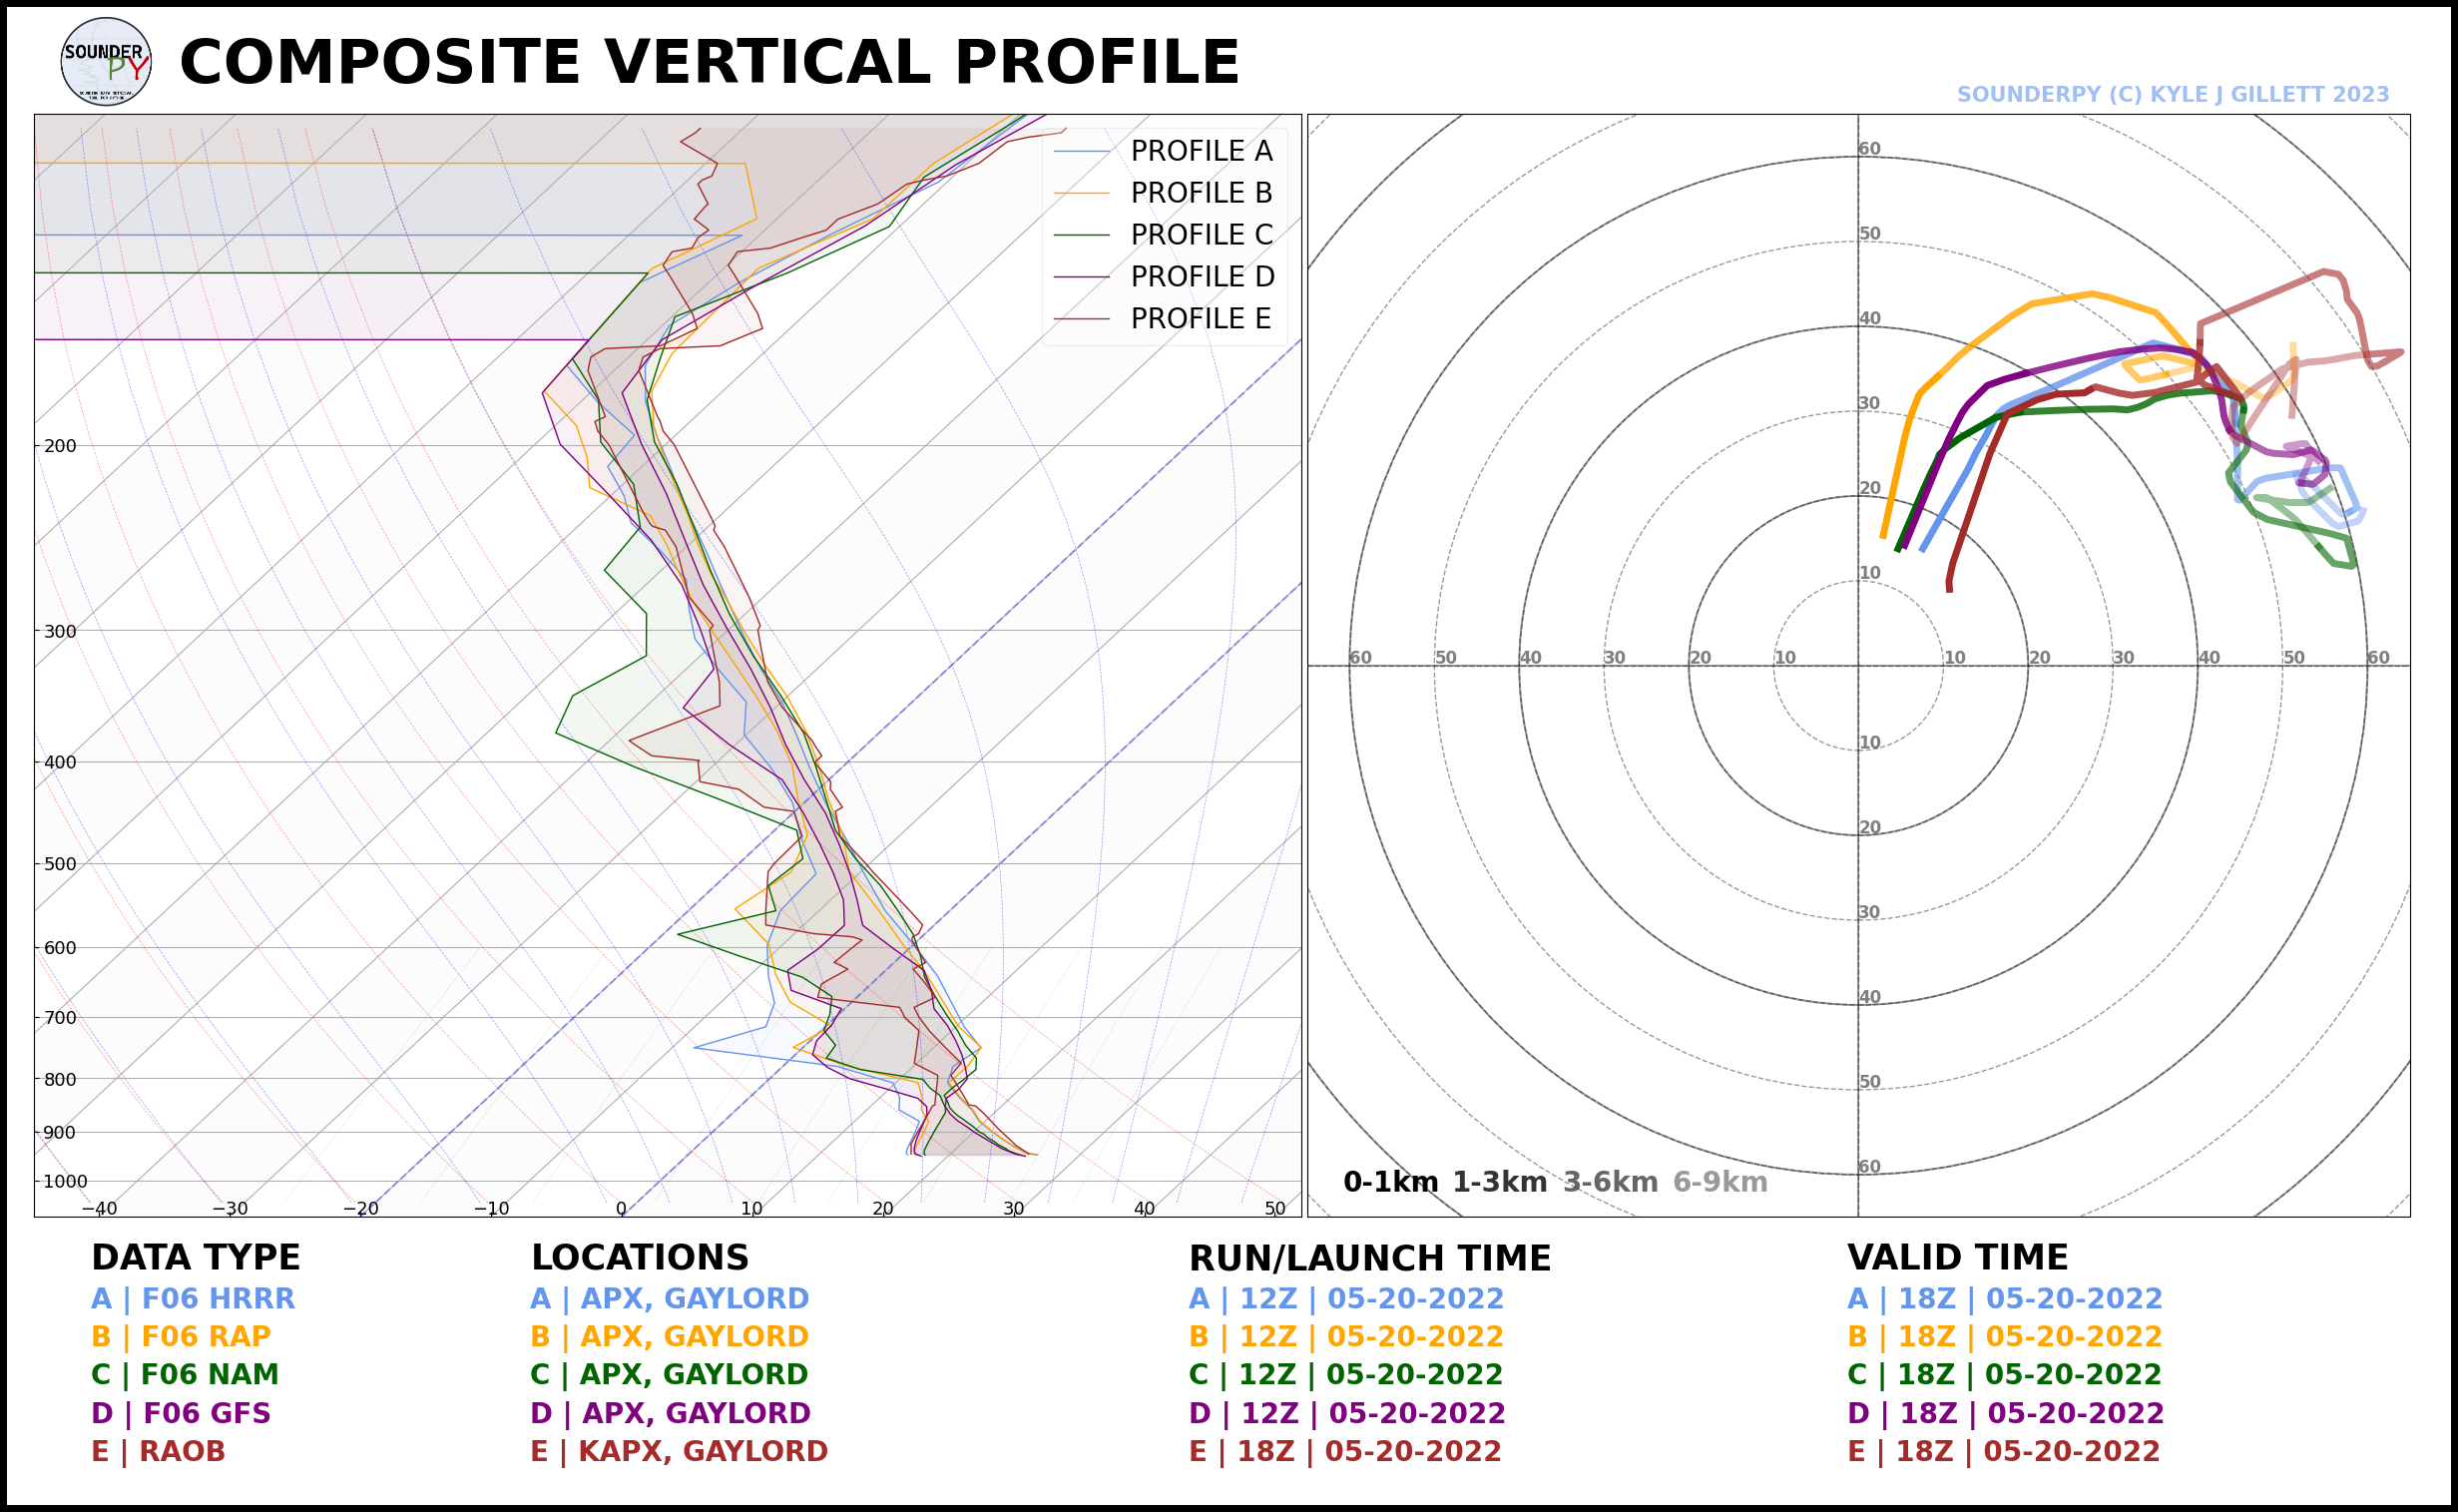

In [3]:
# add those dictionaries to a list
# the order of data is up to you, but note that
# in later steps the order must be consistent! 

data_list = [hrrr, rap, nam, gfs, raob]

# now we can build our composite with just this to start
spy.build_composite(data_list)

## **Customizing Composite Soundings**

That's decent plot for the tiny line of code it needed. But, we can visually enchance this a bit to really get the effect we want. Recall, we are comparing how well models did to the observed profile, so the observed profile should be the most visible. Lets try to mess with some settings. 

### How can we customize the plot? 
- Changing the colors
- Setting alphas
- Setting line widths
- Setting line styles
- Dark mode

To use these settings we must create lists, of equal length to `data_list`, with the values we want:

> COMPOSITE SOUNDING FUNCTION --
-------------------------------
> COMPLETE --------
> RUNTIME: 00:00:00


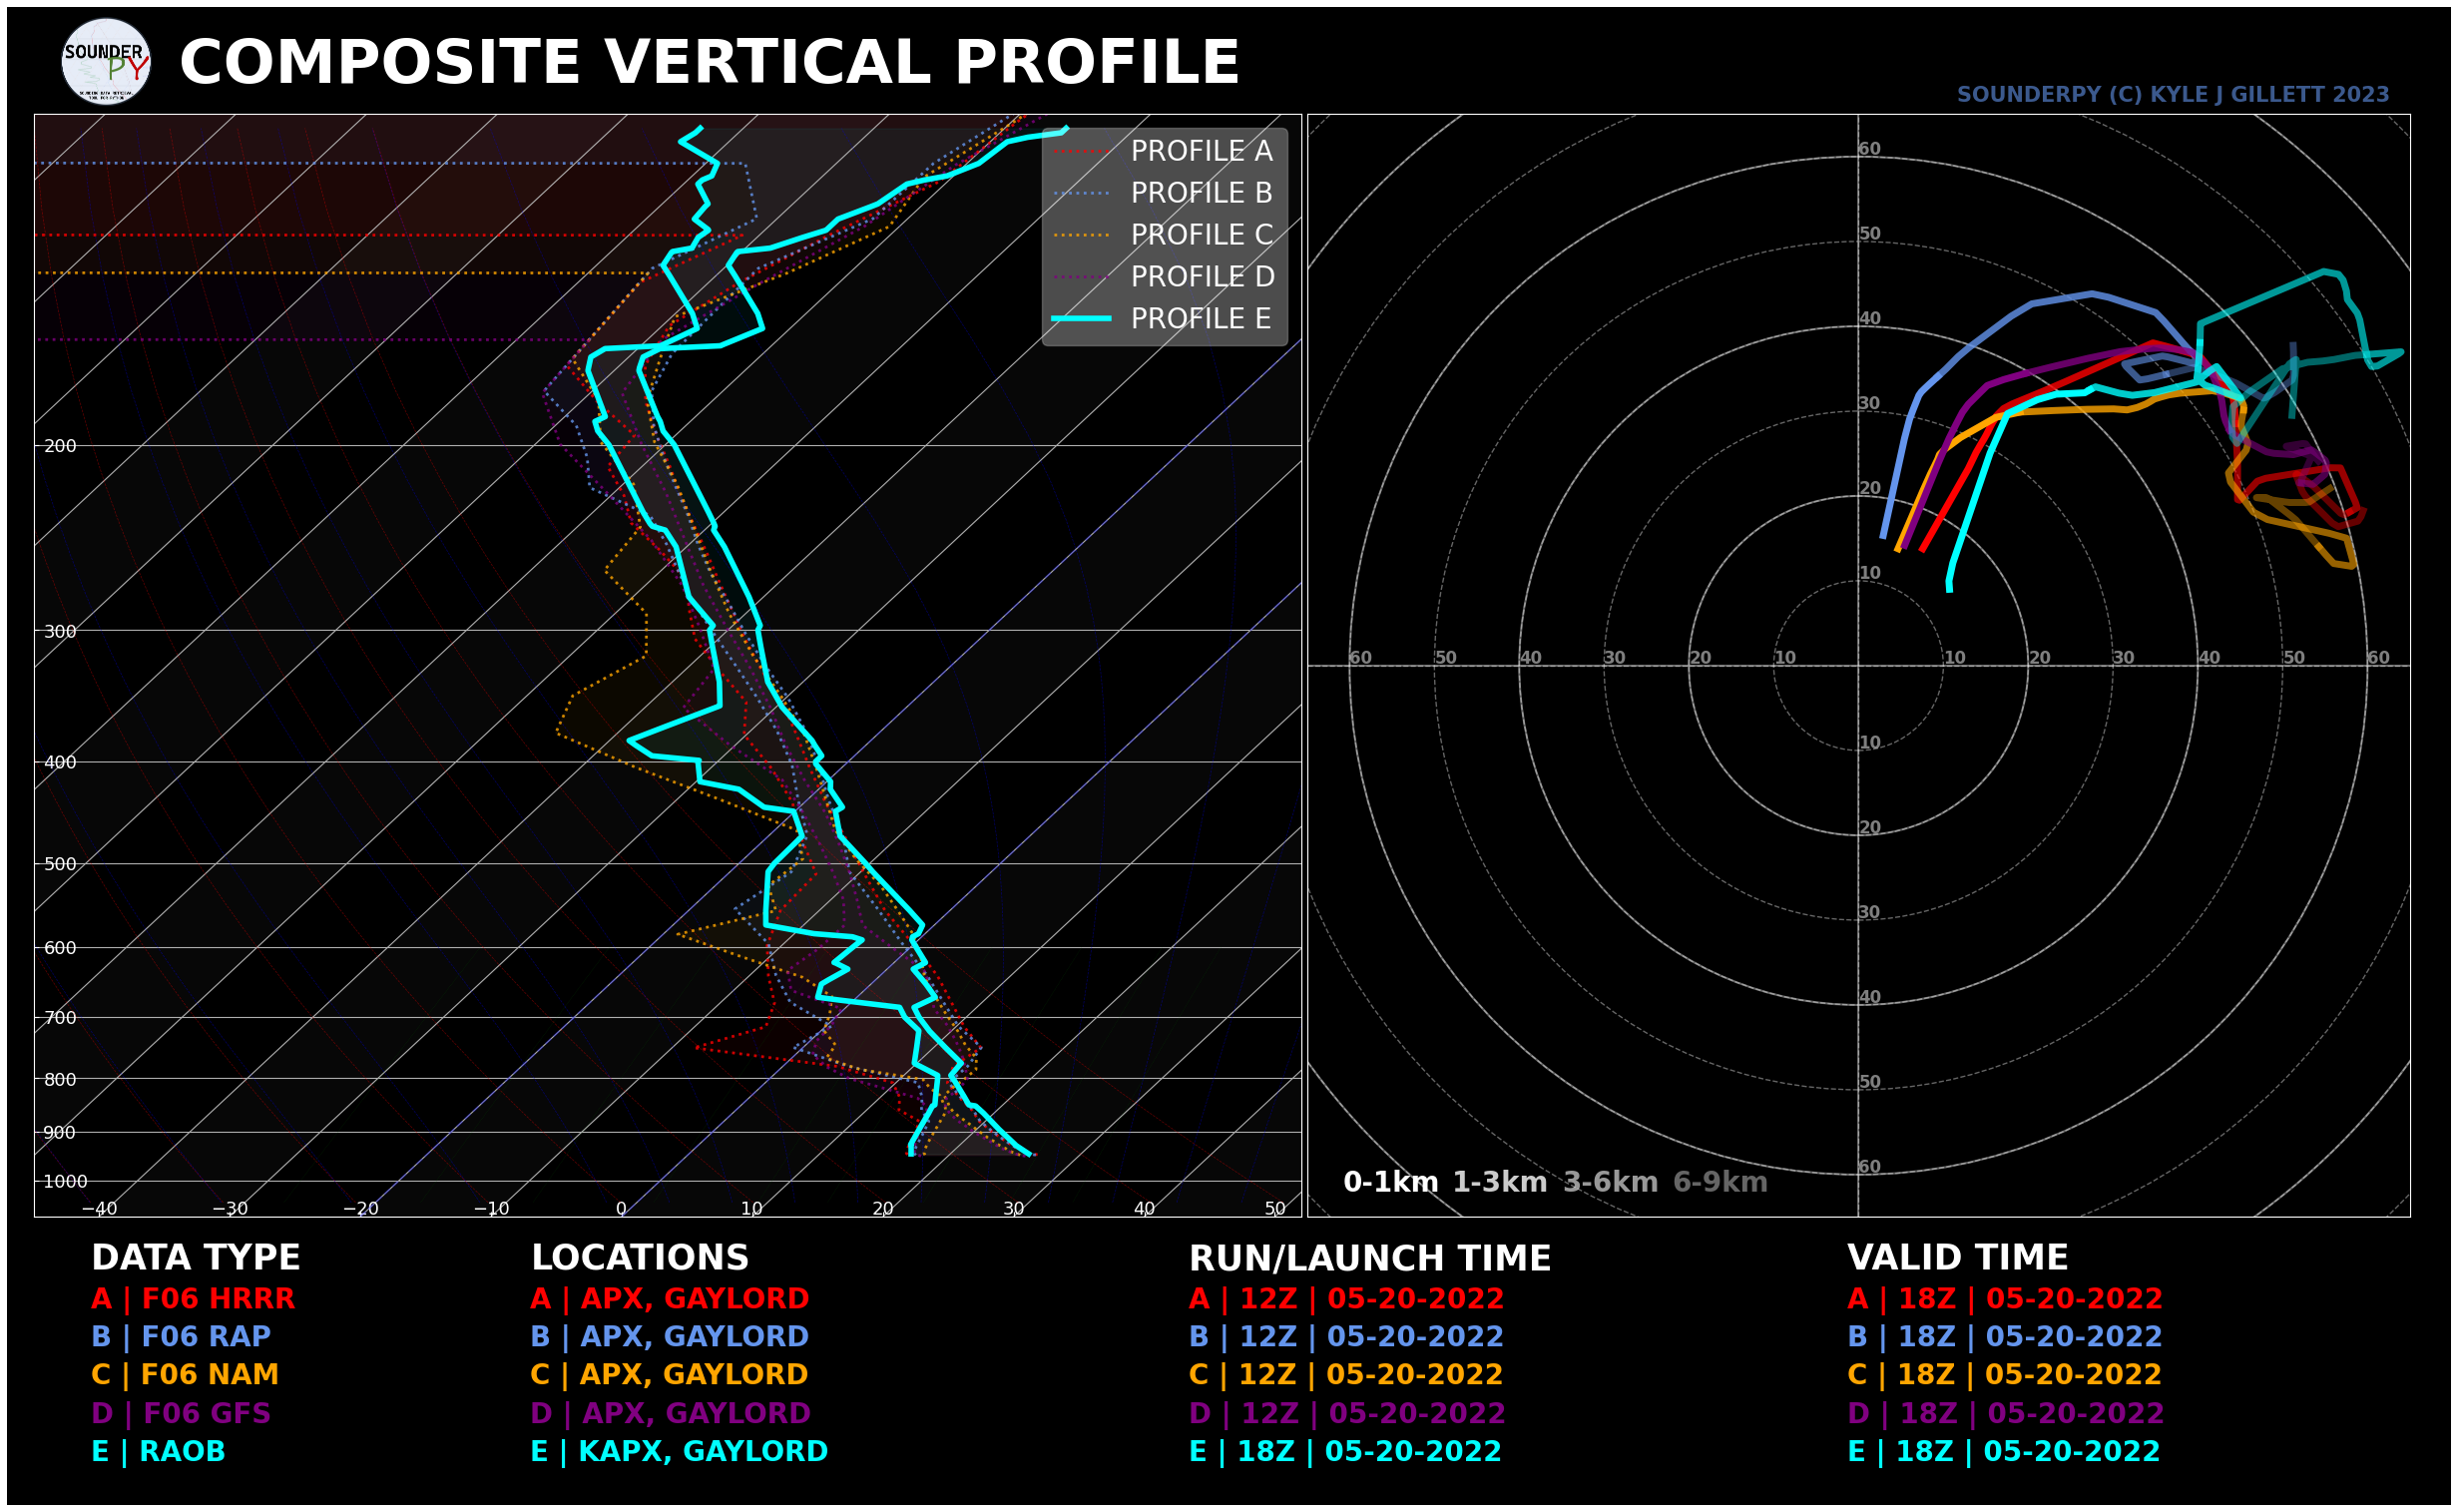

In [20]:
# specify custom colors (cyan will stand out nice for the RAOB -- the last list item)
colors_to_use = ['red', 'cornflowerblue', 'orange', 'purple', 'cyan']

# specify custom linewidths, make the RAOB satnd out with a larger linewidth
lw_to_use = [2, 2, 2, 2, 4] 

# specify custom linestyles, dotted for the models and solid for the RAOB
ls_to_use = [':', ':', ':', ':', '-']

# specify custom alphas just to help the RAOB pop some more.
alphas_to_use = [0.8, 0.8, 0.8, 0.8, 1]

# add it all to the `build_composite()` function!
spy.build_composite(data_list, dark_mode=True, 
                    colors_to_use=colors_to_use,
                    lw_to_use=lw_to_use, 
                    ls_to_use=ls_to_use,
                    alphas_to_use=alphas_to_use)

## Saving plots as a file

By default, SounderPy is set to show plots inline. If you want/need to save them to a file, SounderPy offers that option! 

Just set the `save` kwarg to True, and give it a file name using the `filename` kwarg! 

### IMPORTANT NOTE!!!

- If your plots come out with a funky layout when displaying them inline, it may be due to your screen resolution. 
- In the event that this is the case, simply use the `save=True` option to save plots to a file!

In [6]:
#spy.build_composite(data_list, save=True, filename='composite_model-raob_0520202218z')